<a href="https://colab.research.google.com/github/marinasr00/TADM/blob/main/titanic_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Que influyó en las muertes de pasajeros del Titanic?
 ¿La clase de pasaje? ¿La edad? ¿El costo del pasaje?

# Copie este notebook en su cuenta junto con los datos **titanic.csv** 
moodle de clase

In [ ]:
from google.colab import files
uploaded= files.upload()

In [1]:
%cd /content/Titanic

/content/Titanic


## Utilice estas librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz

## Lea el fichero de datos en un DataFrame de pandas **datos**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

Defino el archivo csv para importar el dataframe en pandas:

In [4]:
# import pandas module 
import pandas as pd 
  
# making dataframe 
titanic = pd.read_csv("titanic.csv")
   
# output the dataframe
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Investigue si hay datos erróneos o vacios con valor **Nan** y elimínelos

Para saber si en mi dataframe existen datos erróneos o vacios utilizaremos el siguiente código:

In [6]:
titanic.isnull().values.any()

True

En este caso, True, corrobora la existencia de estos.

¿En qué columnas existen valores nulos?

Existen dos formas de averiguarlo:

In [21]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Donde existen este tipo de datos, son en las columnas de Age, Cabin y Embarked.

A continuación, se llevará a cabo un código para ver cuántos Nan tenemos en estas categorías:

In [ ]:
len(titanic[titanic['Cabin'].isnull()])

687

In [8]:
len(titanic[titanic['Embarked'].isnull()])

2

In [9]:
len(titanic[titanic['Age'].isnull()])

177

**Comprobación**:

Sum = columnas
Any = filas

In [ ]:
null_columns=titanic.columns[titanic.isnull().any()]
titanic[null_columns].isnull().sum()
print(titanic[titanic.isnull().any(axis=1)][null_columns].head())

    Age Cabin Embarked
0  22.0   NaN        S
2  26.0   NaN        S
4  35.0   NaN        S
5   NaN   NaN        Q
7   2.0   NaN        S


Aún así, únicamente se va a limpiar las variables pedidas para realizar mi árbol de clasificación de mi base de datos:

In [22]:
X=titanic[['Survived','Pclass','Age','Fare']].dropna()

Hemos creado un data frame con esas 4 columnas y no quiero datos que sean nulos (NaN). 

In [23]:
X.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## Con los datos limpios cree el conjunto de datos de entrenamiento
- **X** con las columnas 'Pclass','Age' y 'Fare'
- **y** con la columna 'Survived'

axis = 1: indica que el método correspondiente se ejecuta horizontalmente, es decir, me elimina los Nan de las filas.

Definimos las variables que vamos a coger para nuestro modelo (x e y):

In [24]:
y=X['Survived']
X=X.drop(['Survived'],axis=1)

y = 1 si es superviviente y un 0 si no sobrevive. 
En los valores de X hay que quitarle los datos correspondientes de la variable dependiente.

Se asigna un nombre para estas variables:

In [25]:
train_x = X
train_y = y

## Cree el árbol de clasificación **Ad**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Ad = DecisionTreeClassifier(max_depth=2, criterion = 'gini')
Ad = Ad.fit(train_x,train_y)

Se ajusta el modelo a través del fit. 

[Text(0.5, 0.8333333333333334, 'X[0] <= 2.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.25, 0.5, 'X[2] <= 13.646\ngini = 0.49\nsamples = 359\nvalue = [154, 205]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 84\nvalue = [56, 28]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.459\nsamples = 275\nvalue = [98, 177]'),
 Text(0.75, 0.5, 'X[1] <= 6.5\ngini = 0.364\nsamples = 355\nvalue = [270, 85]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.331\nsamples = 325\nvalue = [257, 68]')]

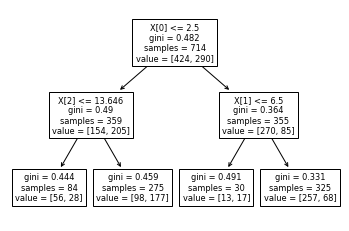

In [27]:
tree.plot_tree(Ad)

Se predice el modelo:

In [28]:
Ad.predict(X)!=y

0      False
1      False
2       True
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Survived, Length: 714, dtype: bool

El modelo no es perfecto, ya que tenemos dos argumentos: false y true. Esto significa que la edad, el coste y la clase no va a explicar en su totalidad que una persona sobreviva o no.

## Muestre árbol obtenido en forma de texto.

In [29]:
from sklearn.tree import export_text
r = export_text(Ad, feature_names=list(X.columns))
print(r)

|--- Pclass <= 2.50
|   |--- Fare <= 13.65
|   |   |--- class: 0
|   |--- Fare >  13.65
|   |   |--- class: 1
|--- Pclass >  2.50
|   |--- Age <= 6.50
|   |   |--- class: 1
|   |--- Age >  6.50
|   |   |--- class: 0



## Exporte el árbol obtenido a un fichero **titanic.pdf**


In [30]:
import graphviz 
dot_data = tree.export_graphviz(Ad, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("titanic")

'titanic.pdf'

X[0] es la columna 0 de nuestro data frame, que es Pclass (la clase).
X[1] es la columna 1 de nuestro data frame, que es Fare (el coste). 
X[2] es Age (edad).

## Muestre de forma enriquecida el árbol obtenido


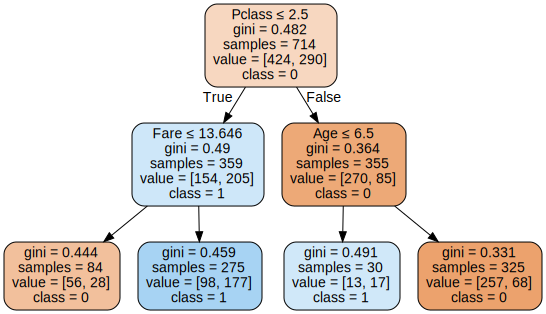

In [31]:
import graphviz
dot_data = tree.export_graphviz(Ad, out_file=None,  
                    feature_names=X.columns,
                     class_names=['0','1'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

La mejor pregunta para dividir el árbol es cuando la clase es menor o igual a 2.5.


## ¿Que característas son las más influyentes o decisivas?

In [32]:
l=list(zip(list(X.columns), Ad.feature_importances_))
print(l)

[('Pclass', 0.6691336515615431), ('Age', 0.11963203647839815), ('Fare', 0.21123431196005865)]


La variable más importante sería la clase a la que pertenecen los pasajeros. 
Para sobrevivir tenían que tener un pasaje de clase alta y ser mujer con una edad mayor. 

## Realiza alguna inferencia.
Que propone para las filas 5 y 80 del Titanic.csv

In [33]:
X.iloc[[5,80]]

,Pclass,Age,Fare
6,1,54.0,51.8625
103,3,33.0,8.6542


In [34]:
Ad.predict(X.iloc[[5,80]].values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

Values me devuelve el vector numpy de los valores de ese data frame.